In [1]:
import numpy as np
import cv2
import random

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')
#pper_body = cv2.CascadeClassifier('haarcascade_upperbody.xml')

In [3]:
# Adjust threshold value in range 80 to 105 based on your light.
bw_threshold = 80

# User message
font = cv2.FONT_HERSHEY_SIMPLEX
org = (30, 30)
weared_mask_font_color = (255, 255, 255)
not_weared_mask_font_color = (0, 0, 255)
thickness = 2
font_scale = 1
weared_mask = "MASK"
not_weared_mask = "No MASK"

In [4]:
# Read video
cap = cv2.VideoCapture(0)

while 1:
    # Get individual frame
    ret, img = cap.read()
    img = cv2.flip(img, 1)

    # Convert Image into gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Convert image in black and white
    (thresh, black_and_white) = cv2.threshold(
        gray, bw_threshold, 255, cv2.THRESH_BINARY)

    # detect face
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Face prediction for black and white
    faces_bw = face_cascade.detectMultiScale(black_and_white, 1.1, 4)

    if (len(faces) == 0 and len(faces_bw) == 0):
        cv2.putText(img, "No face found...", org, font, font_scale,
                    weared_mask_font_color, thickness, cv2.LINE_AA)
    elif (len(faces) == 0 and len(faces_bw) == 1):
        # It has been observed that for white mask covering mouth, with gray image face prediction is not happening
        cv2.putText(img, weared_mask, org, font, font_scale,
                    weared_mask_font_color, thickness, cv2.LINE_AA)
    else:
        # Draw rectangle on gace
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]

            # Detect lips counters
            mouth_rects = mouth_cascade.detectMultiScale(gray, 1.5, 5)

        # Face detected but Lips not detected which means person is wearing mask
        if (len(mouth_rects) == 0):
            cv2.putText(img, weared_mask, org, font, font_scale,
                        weared_mask_font_color, thickness, cv2.LINE_AA)
        else:
            for (mx, my, mw, mh) in mouth_rects:

                if (y < my < y + h):
                    # Face and Lips are detected but lips coordinates are within face cordinates which `means lips prediction is true and
                    # person is not waring mask
                    cv2.putText(img, not_weared_mask, org, font, font_scale,
                                not_weared_mask_font_color, thickness, cv2.LINE_AA)

                    #cv2.rectangle(img, (mx, my), (mx + mh, my + mw), (0, 0, 255), 3)
                    break

    # Show frame with results
    cv2.imshow('Mask Detection', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

# Release video
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

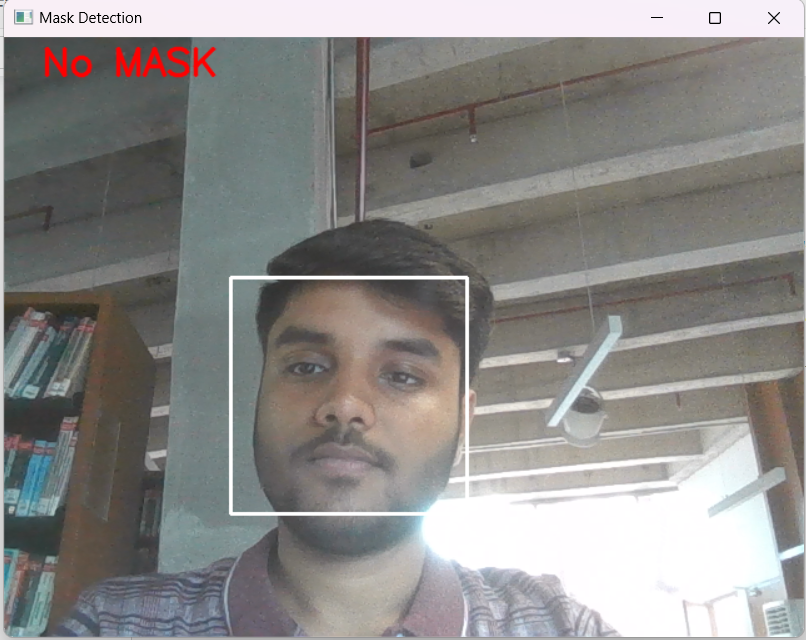

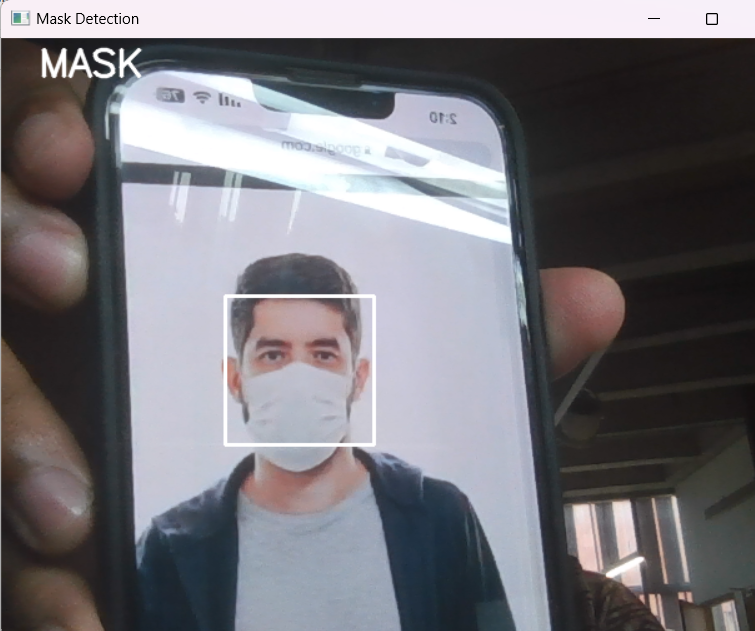